# Tugas Naive Bayes

## Persiapan Data

In [1]:
#visualisasi data
import plotly.figure_factory as ff
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

#pengolahan data
import pandas as pd
import numpy as np

#pembuatan model|
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#evaluasi model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
#memuat data pada sebuah dataframe menggunakan pandas
df = pd.read_csv('https://raw.githubusercontent.com/MRendiks/CV-Robotics/main/Pertemuan_1/Supervised_Learning/waterQuality1.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
#Memuat informasi pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
# Menghitung jumlah data kosong pada setiap kolom
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
#menghitung banyaknya kolom dataset
len(df.columns)

21

In [ ]:
#karena data ini baik-baik saja, maka langsung bisa di lakukan pembuatan model
df = df[:3000]
Y = df.iloc[:, 20]
X = df.drop(['ammonia', 'is_safe'], axis=1)

In [ ]:
X

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,0.040,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,0.010,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,0.040,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,0.040,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,0.030,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.02,0.001,3.67,0.002,3.63,0.63,1.47,1.37,0.31,0.002,0.197,13.53,1.09,0.005,11.55,2.13,0.09,0.05,0.03
2996,0.09,0.010,3.84,0.006,5.22,0.79,1.97,1.48,0.34,0.009,0.031,9.52,1.43,0.001,16.06,1.11,0.09,0.14,0.08
2997,0.38,0.001,1.74,0.002,2.46,0.34,0.71,0.91,0.66,0.660,0.182,15.37,1.90,0.006,5.61,4.84,0.08,0.05,0.05
2998,0.02,0.010,0.38,0.002,3.13,0.57,1.18,0.03,0.28,0.000,0.069,0.46,1.65,0.004,56.99,1.73,0.05,0.43,0.04


In [ ]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Name: is_safe, Length: 3000, dtype: object

In [ ]:
#proses pembagian data untuk pembuatan model
X_latih, X_tes, Y_latih, Y_tes = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
#melihat banyak nya masing-masing data untuk training dan testing
print('Data X Latih : ', len(X_latih))
print('Data Y Latih : ', len(Y_latih))
print('Data X Testing : ', len(X_tes))
print('Data Y Testing : ', len(Y_tes))

Data X Latih :  2100
Data Y Latih :  2100
Data X Testing :  900
Data Y Testing :  900


## Pembuatan Model Naive Bayes

In [ ]:
#proses pembuatan model
gnb = GaussianNB()

gnb.fit(X_latih, Y_latih)

Y_pred = gnb.predict(X_tes)

In [ ]:
#melihat akurasi dari model
print("Akurasi model : ",accuracy_score(Y_tes, Y_pred))

Akurasi model :  0.7466666666666667


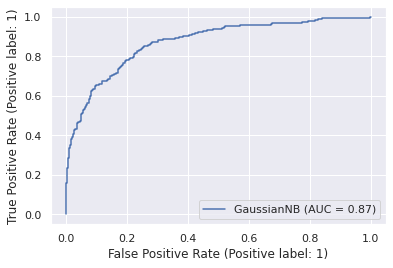

In [ ]:
ax = plt.gca()
gnb_vis = RocCurveDisplay.from_estimator(gnb, X_tes, Y_tes, ax=ax)

## Evaluasi Model

In [ ]:
# Menyimpan hasil prediksi untuk confussion matrix
gnb_cf = confusion_matrix(Y_tes, Y_pred)

In [ ]:
gnb_cf

array([[483, 200],
       [ 28, 189]])

In [ ]:
# Membuat fungsi untuk menampilkan confusion matrix
def plot_cm(matrix, title):
  z = matrix
  x = ['Safe', 'Not']
  y = x

  z_text = [[str(y) for y in x] for x in z]
  z_text.reverse()

  fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='blugrn')

  fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title))

  fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.1,
                            'showarrow':False,
                            'text':"",
                            'xref':"paper",
                            'yref':"paper"})
    
  fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.20,
                            'y':0.5,
                            'showarrow':False,
                            'text':"",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


  # Mengatur margin
  fig.update_layout(margin={'t':50, 'l':20},width=500,height=500)
    
  fig['data'][0]['showscale'] = True
  fig.show()

In [ ]:
plot_cm(gnb_cf, title="model")

In [ ]:
nb_report = classification_report(Y_tes, Y_pred, output_dict=True, target_names=['Safe',"Not"])
pd.DataFrame(nb_report).transpose()

,precision,recall,f1-score,support
Safe,0.945205,0.707174,0.809045,683.000000
Not,0.485861,0.870968,0.623762,217.000000
accuracy,0.746667,0.746667,0.746667,0.746667
macro avg,0.715533,0.789071,0.716404,900.000000
weighted avg,0.834452,0.746667,0.764371,900.000000


In [ ]:
# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [nb_report['accuracy']],
                        'precision_0' : [nb_report['Safe']['precision']],
                        'recall_0' : [nb_report['Safe']['recall']],
                        'f1-score_0' : [nb_report['Safe']['f1-score']],
                        'precision_1' : [nb_report['Not']['precision']],
                        'recall_1' : [nb_report['Not']['recall']],
                        'f1-score_1' : [nb_report['Not']['f1-score']]},
                        index=['Naive Bayes Classifier'])
multiheader = [('','accuracy'),
               ('Safe', 'precision'),
               ('Safe', 'recall'),
               ('Safe', 'f1-score'),
               ('Not', 'precision'),
               ('Not', 'recall'),
               ('Not', 'f1-score')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
# Menampilkan dataframe
metrics

Safe                           Not  \
                        accuracy precision    recall  f1-score precision   
Naive Bayes Classifier  0.746667  0.945205  0.707174  0.809045  0.485861   

                                            
                          recall  f1-score  
Naive Bayes Classifier  0.870968  0.623762